In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt, seaborn as sns
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.4.2
Numpy version : 1.21.5
Matplotlib version : 3.5.1


# Strip all strings in columns and dataframe

In [91]:
url = url = './icu_organ_20.csv'
df = pd.read_csv(url)
df.sample(5)  

,,record_id,hn,age,sex,weight,height,bmi,pbw,h_adm,...,doa_28,surv_28,mort_90,doa_90,surv_90,mort_1y,doa_1y,surv_1y,cum_fluid,fluid_overload
7,8,168,0ad4195af840a287449cf2d1f47e196a975fb4d489b07d...,64,1,55.0,175,17.96,70.57,10/9/2014,...,11/6/2014,28,0,1/7/2015,90,0,10/9/2015,365,5304,1.45
9,10,358,6e85844683ace5772d5aef5a8f6724ad826a323ff5c80c...,93,1,60.2,165,22.11,61.47,2/23/2015,...,3/23/2015,28,1,4/4/2015,40,1,4/4/2015,40,7228,12.01
6,7,221,3ab87abeb82c641902635d007fb8cae3c1b29189e6da8c...,81,0,53.7,156,22.07,48.78,11/9/2014,...,12/9/2014,28,0,2/9/2015,90,0,11/11/2015,365,-1545,-0.39
12,13,181,0865752bfca758ff640b0b6042a0115191c57117db5bfd...,53,1,50.0,165,18.37,61.47,10/20/2014,...,11/17/2014,28,0,1/18/2015,90,0,10/20/2015,365,7087,2.08
15,16,148,9a28263d4baf6b38ebb53fb6907df46fd0823976bb57e5...,79,1,60.0,160,23.44,56.92,9/28/2014,...,10/26/2014,28,0,12/27/2014,90,1,1/13/2015,107,4137,3.21


In [92]:
# strip all columns
df = df.rename(columns=lambda x: x.strip())
# strip all text data
df = df.apply(lambda x: x.str.strip() if x.dtype.name == 'object' else x, axis=0)
# remove identity columns "", record_id, hn
drop_list=[df.columns[0],df.columns[1],df.columns[2]] 
df.drop(drop_list, inplace=True, axis=1)

In [93]:
urlSave = './icu_organ_20_strip.csv'
df.to_csv(urlSave,
           sep='|',
           index=False,
           encoding='utf-8')   

# Download Strip Data

In [5]:
url = './icu_organ_20_strip.csv'
# df = pd.read_csv(url, sep=',',parse_dates=["h_adm"])
df = pd.read_csv(url, sep='|')
df.sample(5)

,age,sex,weight,height,bmi,pbw,h_adm,icu_adm,icu_dc,h_dc,...,doa_28,surv_28,mort_90,doa_90,surv_90,mort_1y,doa_1y,surv_1y,cum_fluid,fluid_overload
5,29,0,70.0,155,29.14,47.87,1/8/2015,1/10/2015,1/15/2015,1/16/2015,...,2/7/2015,28,0,4/10/2015,90,0,1/10/2016,365,-2683,-2.03
6,81,0,53.7,156,22.07,48.78,11/9/2014,11/11/2014,11/15/2014,11/26/2014,...,12/9/2014,28,0,2/9/2015,90,0,11/11/2015,365,-1545,-0.39
10,42,1,73.0,170,25.26,66.02,8/23/2014,8/23/2014,9/5/2014,10/4/2014,...,9/20/2014,28,0,11/21/2014,90,0,8/23/2015,365,-2274,3.16
0,89,1,60.0,163,22.58,59.65,12/10/2014,12/11/2014,12/13/2014,12/18/2014,...,1/8/2015,28,0,3/11/2015,90,0,12/11/2015,365,3903,5.24
9,93,1,60.2,165,22.11,61.47,2/23/2015,2/23/2015,2/27/2015,4/4/2015,...,3/23/2015,28,1,4/4/2015,40,1,4/4/2015,40,7228,12.01


In [6]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 118 entries, age to fluid_overload
dtypes: float64(40), int64(61), object(17)
memory usage: 18.6+ KB


age                 int64
sex                 int64
weight            float64
height              int64
bmi               float64
                   ...   
mort_1y             int64
doa_1y             object
surv_1y             int64
cum_fluid           int64
fluid_overload    float64
Length: 118, dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'weight', 'height', 'bmi', 'pbw', 'h_adm', 'icu_adm',
       'icu_dc', 'h_dc',
       ...
       'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
       'doa_1y', 'surv_1y', 'cum_fluid', 'fluid_overload'],
      dtype='object', length=118)

convert to datetime datatype

In [8]:
df['h_adm']=pd.to_datetime(df['h_adm'])
df['icu_adm']=pd.to_datetime(df['icu_adm'])
df['icu_dc']=pd.to_datetime(df['icu_dc'])
df['h_dc']=pd.to_datetime(df['h_dc'])
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 118 columns):
 #    Column          Non-Null Count  Dtype         
---   ------          --------------  -----         
 0    age             20 non-null     int64         
 1    sex             20 non-null     int64         
 2    weight          20 non-null     float64       
 3    height          20 non-null     int64         
 4    bmi             20 non-null     float64       
 5    pbw             20 non-null     float64       
 6    h_adm           20 non-null     datetime64[ns]
 7    icu_adm         20 non-null     datetime64[ns]
 8    icu_dc          20 non-null     datetime64[ns]
 9    h_dc            20 non-null     datetime64[ns]
 10   reason___1      20 non-null     int64         
 11   reason___2      20 non-null     int64         
 12   reason___3      20 non-null     int64         
 13   reason___4      20 non-null     int64         
 14   reason___5      20 non-null     int64     

# Check and drop duplicate

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Perform data preprocessing, imputation, or delete incomplete sample

find null value, calculate missingness by count number and percentages

In [11]:
df.isnull().values.any(), df.isnull().sum().sum()

(True, 528)

In [12]:
# df.isnull().sum(), df.isnull().mean()*100
for col in df.columns:
    if(df[col].isnull().sum() > 0):
        print('{0:15s} : {1:5d}'.format(col, df[col].isnull().sum()))

arf_af          :    10
arf_date        :    16
int_num         :     4
int_date_1      :     4
ext_date_1      :     4
int_date_2      :    20
ext_date_2      :    20
int_date_3      :    20
ext_date_3      :    20
int_date_4      :    20
ext_date_4      :    20
int_date_5      :    20
ext_date_5      :    20
vae             :     4
vae_onset       :    19
tsc_growth      :     4
organism_num    :    20
tsc_result_1    :    20
tsc_result_2    :    20
tsc_result_3    :    20
last_assist     :     4
mv_duration     :     4
aki_onset       :     8
aki_stage       :     8
crrt_duration   :    18
hd_duration     :    20
pd_duration     :    20
hypo_shock      :     6
septic_shock    :     6
cardio_shock    :     6
obs_shock       :     6
ad_shock        :     6
norepi          :     6
epi             :     6
dopa            :     6
dobu            :     6
norepi_dose     :    10
epi_dose        :    16
dopa_dose       :    18
dobu_dose       :    19
nut_start       :     2
en_start        

In [13]:
npdisplay = np.stack([df.isnull().sum(),df.isnull().mean()*100],axis=1)
nulldf = pd.DataFrame(npdisplay,columns = ['Sum_Null','% Null'], index=df.columns)

def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: green' if is_max.any() else '' for v in is_max]

nulldf.style.apply(highlight_greaterthan, threshold=50.00, column=['% Null'], axis=1)

,Sum_Null,% Null
age,0.000000,0.000000
sex,0.000000,0.000000
weight,0.000000,0.000000
height,0.000000,0.000000
bmi,0.000000,0.000000
pbw,0.000000,0.000000
h_adm,0.000000,0.000000
icu_adm,0.000000,0.000000
icu_dc,0.000000,0.000000
h_dc,0.000000,0.000000


### Generate visual representations of missingness in data. 
In the matrix view below, the missing values represent with white lines , but for non-missing values show in black lines.

<AxesSubplot:>

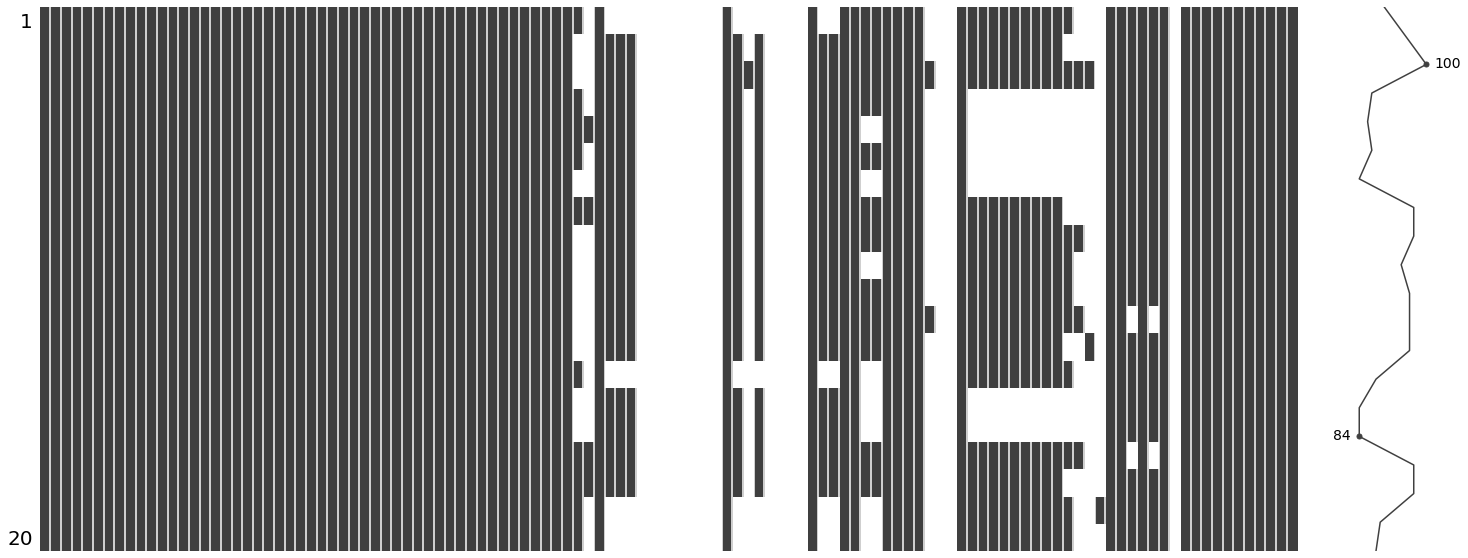

In [17]:
import missingno as msno
msno.matrix(df)

### Remove columns that contain null value more than half

In [18]:
drop_list = nulldf[nulldf['% Null'] >= 50.0].index
drop_list

Index(['arf_af', 'arf_date', 'int_date_2', 'ext_date_2', 'int_date_3',
       'ext_date_3', 'int_date_4', 'ext_date_4', 'int_date_5', 'ext_date_5',
       'vae_onset', 'organism_num', 'tsc_result_1', 'tsc_result_2',
       'tsc_result_3', 'crrt_duration', 'hd_duration', 'pd_duration',
       'norepi_dose', 'epi_dose', 'dopa_dose', 'dobu_dose', 'pn_start'],
      dtype='object')

In [19]:
# df = df[df.columns.difference(['durinjm','stopinjm','agedm'])]
# drop_list=['agedm','stophrtm','durhrtm','stopocm','durocm','durinjm','stopinjm']
df.drop(drop_list, inplace=True, axis=1)
df.isnull().values.any(), df.isnull().sum().sum()

(True, 102)

### DateTime Adjust

In [ ]:
def preprocessDate(strDate):
  ddmmm = strDate[:5].upper()
  year = str(int(strDate[-4:]) - 543)
  adjustDate = ddmmm + year
  return adjustDate

In [ ]:
#adjust date time string to appropriate pattern
df['bdate'] = df['bdate'].apply(preprocessDate)
df['bdate'] = pd.to_datetime(df['bdate'], errors='raise')

In [ ]:
# create column cur_date
df['cur_date'] = "01JAN2023"
df['cur_date'] = pd.to_datetime(df['cur_date'], errors='raise')

In [ ]:
# create age year column
df['age_y'] = df['cur_date'].dt.year - df['bdate'].dt.year

In [ ]:
#remove unuse column
df.drop(['bdate','cur_date'], inplace=True, axis=1)
#display
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15718 entries, 0 to 15717
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   severity     15704 non-null  object 
 1   marital      15693 non-null  object 
 2   breastfa     15697 non-null  object 
 3   nobreast     15695 non-null  float64
 4   sebreast     15691 non-null  object 
 5   nosecon      15687 non-null  float64
 6   ovafam       15678 non-null  object 
 7   noova        15678 non-null  float64
 8   cancerfa     15694 non-null  object 
 9   weight       15715 non-null  float64
 10  height       15708 non-null  float64
 11  age_new      15718 non-null  int64  
 12  ht_new       15718 non-null  object 
 13  dm_new       15718 non-null  object 
 14  ckd_new      15718 non-null  object 
 15  dlp_new      15718 non-null  object 
 16  agemen       15466 non-null  float64
 17  parity       15718 non-null  object 
 18  noparity     15717 non-null  float64
 19  abor

,severity,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,weight,...,smok,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,diag_cancer,inj,age_y
0,Category2,married,No,0.0,No,0.0,No,0.0,No,63.0,...,Never,No,Yes,Yes,Never,4,111.0,non-cancer,1.0,81
1,Category2,married,No,0.0,No,0.0,No,0.0,Yes,56.0,...,Never,No,No,No,Current user,2,2.0,non-cancer,1.0,80
2,Category2,married,No,0.0,No,0.0,No,0.0,No,51.5,...,Never,Yes,No,No,Never,2,4.0,non-cancer,1.0,76
3,Category2,window,No,0.0,No,0.0,No,0.0,No,64.0,...,Never,No,Yes,No,Never,0,0.0,non-cancer,1.0,78
4,Category2,married,No,0.0,No,0.0,No,0.0,No,60.0,...,Never,No,No,No,Never,2,2.0,non-cancer,1.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15713,Category3,single,No,0.0,No,0.0,No,0.0,No,57.0,...,Never,Yes,Yes,No,Never,0,0.0,non-cancer,1.0,59
15714,Category2,married,Yes,1.0,No,0.0,No,0.0,No,73.0,...,Never,No,No,Yes,Never,2,6.0,non-cancer,1.0,71
15715,Category4a,married,No,0.0,No,0.0,No,0.0,No,62.5,...,Never,Yes,Yes,No,Current user,2,12.0,non-cancer,2.0,60
15716,Category2,married,No,0.0,No,0.0,No,0.0,No,56.0,...,Never,No,No,No,Current user,1,14.0,non-cancer,1.0,48


### Imputaion null value

In [ ]:
from sklearn.impute import SimpleImputer
# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
# Mode Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# imputation 2 column with mean value
df['agechild'] = mean_imputer.fit_transform(df['agechild'].values.reshape(-1,1))
df['agemeno'] = mean_imputer.fit_transform(df['agemeno'].values.reshape(-1,1))

# imputation with mode value
df['menonat'] = mode_imputer.fit_transform(df['menonat'].values.reshape(-1,1))

df.isnull().sum()

severity        14
marital         25
breastfa        21
nobreast        23
sebreast        27
nosecon         31
ovafam          40
noova           40
cancerfa        24
weight           3
height          10
age_new          0
ht_new           0
dm_new           0
ckd_new          0
dlp_new          0
agemen         252
parity           0
noparity         1
abort            0
noabort          0
nochild          0
agechild         0
brefed          13
menopau          0
agemeno          0
menonat          0
hrt             71
oc              28
smok            16
childsmo        55
housesmo        52
worksmo         63
alc             17
nobrefed         0
dur_brefed      27
diag_cancer      0
inj             44
age_y            0
dtype: int64

### Drop some null value data

In [20]:
df.dropna(inplace=True)
df

,age,sex,weight,height,bmi,pbw,h_adm,icu_adm,icu_dc,h_dc,...,doa_28,surv_28,mort_90,doa_90,surv_90,mort_1y,doa_1y,surv_1y,cum_fluid,fluid_overload
1,60,1,60.9,158,24.40,55.10,2015-03-27,2015-05-15,2015-05-19,2015-06-01,...,6/12/2015,28,0,8/13/2015,90,0,5/14/2016,365,1697,2.88
2,56,0,74.0,158,29.64,50.60,2014-07-07,2014-07-07,2014-07-18,2014-07-18,...,7/18/2014,11,1,7/18/2014,11,1,7/18/2014,11,23245,1.31
7,64,1,55.0,175,17.96,70.57,2014-10-09,2014-10-09,2014-10-16,2014-10-18,...,11/6/2014,28,0,1/7/2015,90,0,10/9/2015,365,5304,1.45
8,39,0,52.5,160,20.51,52.42,2015-03-29,2015-03-29,2015-04-10,2015-04-10,...,4/10/2015,12,1,4/10/2015,12,1,4/10/2015,12,11109,-2.82
10,42,1,73.0,170,25.26,66.02,2014-08-23,2014-08-23,2014-09-05,2014-10-04,...,9/20/2014,28,0,11/21/2014,90,0,8/23/2015,365,-2274,3.16
12,53,1,50.0,165,18.37,61.47,2014-10-20,2014-10-20,2014-10-26,2014-10-26,...,11/17/2014,28,0,1/18/2015,90,0,10/20/2015,365,7087,2.08
17,55,0,49.0,153,20.93,46.05,2014-11-06,2014-11-06,2014-11-11,2014-11-16,...,12/4/2014,28,0,2/4/2015,90,0,11/6/2015,365,617,0.15


In [21]:
df.describe()

,age,sex,weight,height,bmi,pbw,reason___1,reason___2,reason___3,reason___4,...,enteral,parenteral,mort_28,surv_28,mort_90,surv_90,mort_1y,surv_1y,cum_fluid,fluid_overload
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,...,7.0,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,52.714286,0.571429,59.200000,162.714286,22.438571,57.461429,0.714286,0.285714,0.428571,0.0,...,1.0,0.0,0.285714,23.285714,0.285714,67.571429,0.285714,264.000000,6683.571429,1.172857
std,9.123491,0.534522,10.516495,7.696629,4.208608,8.845382,0.487950,0.487950,0.534522,0.0,...,0.0,0.0,0.487950,8.056349,0.487950,38.305166,0.487950,172.490579,8542.429160,2.031861
min,39.000000,0.000000,49.000000,153.000000,17.960000,46.050000,0.000000,0.000000,0.000000,0.0,...,1.0,0.0,0.000000,11.000000,0.000000,11.000000,0.000000,11.000000,-2274.000000,-2.820000
25%,47.500000,0.000000,51.250000,158.000000,19.440000,51.510000,0.500000,0.000000,0.000000,0.0,...,1.0,0.0,0.000000,20.000000,0.000000,51.000000,0.000000,188.500000,1157.000000,0.730000
50%,55.000000,1.000000,55.000000,160.000000,20.930000,55.100000,1.000000,0.000000,0.000000,0.0,...,1.0,0.0,0.000000,28.000000,0.000000,90.000000,0.000000,365.000000,5304.000000,1.450000
75%,58.000000,1.000000,66.950000,167.500000,24.830000,63.745000,1.000000,0.500000,1.000000,0.0,...,1.0,0.0,0.500000,28.000000,0.500000,90.000000,0.500000,365.000000,9098.000000,2.480000
max,64.000000,1.000000,74.000000,175.000000,29.640000,70.570000,1.000000,1.000000,1.000000,0.0,...,1.0,0.0,1.000000,28.000000,1.000000,90.000000,1.000000,365.000000,23245.000000,3.160000


In [24]:
useColumns = ['age', 'sex', 'weight', 'height', 'bmi', 'pbw', 'reason___1', 'reason___2', 'reason___3',
       'reason___4', 'reason___5', 'reason___6', 'reason___7', 'reason___8',
       'reason___9', 'pdx', 'icd10_pdx', 'apache', 'sofa',
       'cci_table___1', 'cci_table___2', 'cci_table___3', 'cci_table___4', 'cci_table___5',
       'cci_table___6', 'cci_table___7', 'cci_table___8', 'cci_table___9',
       'cci_table___10', 'cci_table___11', 'cci_table___12', 'cci_table___13',
       'cci_table___14', 'cci_table___15', 'cci_table___16', 'cci_table___17',
       'cci_table___18', 'cci_table___19', 'cci_table___0', 
       'arf_bf', 'mv', 'int_num', 'int_date_1', 'ext_date_1', 'niv', 'vae',
       'tsc_growth', 'mv_duration', 'aki',
       'aki_stage', 'rrt___0', 'rrt___1', 'rrt___2', 'rrt___3',
       'shock', 'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock',
       'ad_shock', 'norepi', 'epi', 'dopa', 'dobu', 'energy_require',
       'nut_supp', 'enteral', 'parenteral', 'cum_fluid', 'fluid_overload']

In [27]:
df[useColumns]

,age,sex,weight,height,bmi,pbw,reason___1,reason___2,reason___3,reason___4,...,norepi,epi,dopa,dobu,energy_require,nut_supp,enteral,parenteral,cum_fluid,fluid_overload
1,60,1,60.9,158,24.40,55.10,1,0,0,0,...,0.0,0.0,0.0,0.0,1377.50,1,1,0,1697,2.88
2,56,0,74.0,158,29.64,50.60,1,0,0,0,...,1.0,1.0,1.0,0.0,1265.00,1,1,0,23245,1.31
7,64,1,55.0,175,17.96,70.57,0,0,1,0,...,0.0,0.0,0.0,0.0,1764.25,1,1,0,5304,1.45
8,39,0,52.5,160,20.51,52.42,1,1,0,0,...,1.0,1.0,0.0,0.0,1310.50,1,1,0,11109,-2.82
10,42,1,73.0,170,25.26,66.02,1,1,0,0,...,1.0,0.0,0.0,0.0,1650.50,1,1,0,-2274,3.16
12,53,1,50.0,165,18.37,61.47,1,0,1,0,...,0.0,0.0,1.0,0.0,1536.75,1,1,0,7087,2.08
17,55,0,49.0,153,20.93,46.05,0,0,1,0,...,0.0,0.0,0.0,0.0,1151.25,1,1,0,617,0.15


In [25]:
predictColums = ['icu_los', 'h_los', 'vfd_28', 'mort_28',
       'doa_28', 'surv_28', 'mort_90', 'doa_90', 'surv_90', 'mort_1y',
       'doa_1y', 'surv_1y']

In [26]:
df[predictColums]

,icu_los,h_los,vfd_28,mort_28,doa_28,surv_28,mort_90,doa_90,surv_90,mort_1y,doa_1y,surv_1y
1,4,66,25,0,6/12/2015,28,0,8/13/2015,90,0,5/14/2016,365
2,11,11,0,1,7/18/2014,11,1,7/18/2014,11,1,7/18/2014,11
7,7,9,26,0,11/6/2014,28,0,1/7/2015,90,0,10/9/2015,365
8,12,12,0,1,4/10/2015,12,1,4/10/2015,12,1,4/10/2015,12
10,13,42,18,0,9/20/2014,28,0,11/21/2014,90,0,8/23/2015,365
12,6,6,23,0,11/17/2014,28,0,1/18/2015,90,0,10/20/2015,365
17,5,10,25,0,12/4/2014,28,0,2/4/2015,90,0,11/6/2015,365


### Visualization

In [41]:
dfVisualization = df[['age', 'sex', 'weight', 'height', 'bmi', 'pbw', 'pdx', 'icd10_pdx', 'apache', 'sofa', 
       'arf_bf', 'mv', 'int_num', 'int_date_1', 'ext_date_1', 'niv', 'vae',
       'tsc_growth', 'mv_duration', 'aki',  'aki_stage', 'shock', 'hypo_shock', 'septic_shock', 'cardio_shock', 'obs_shock',
       'ad_shock', 'norepi', 'epi', 'dopa', 'dobu', 'energy_require',
       'nut_supp', 'enteral', 'parenteral', 'cum_fluid', 'fluid_overload']]

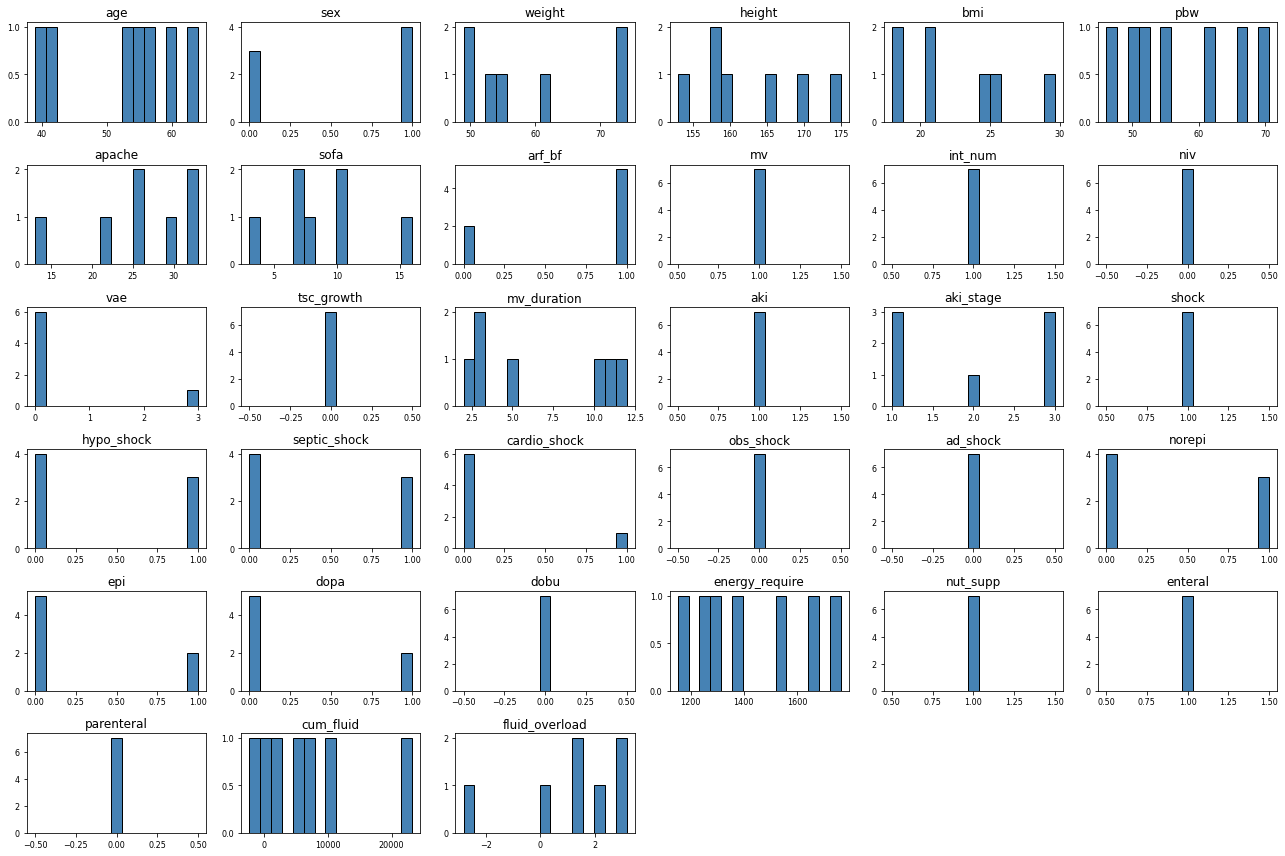

In [42]:
dfVisualization.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 3, 3))

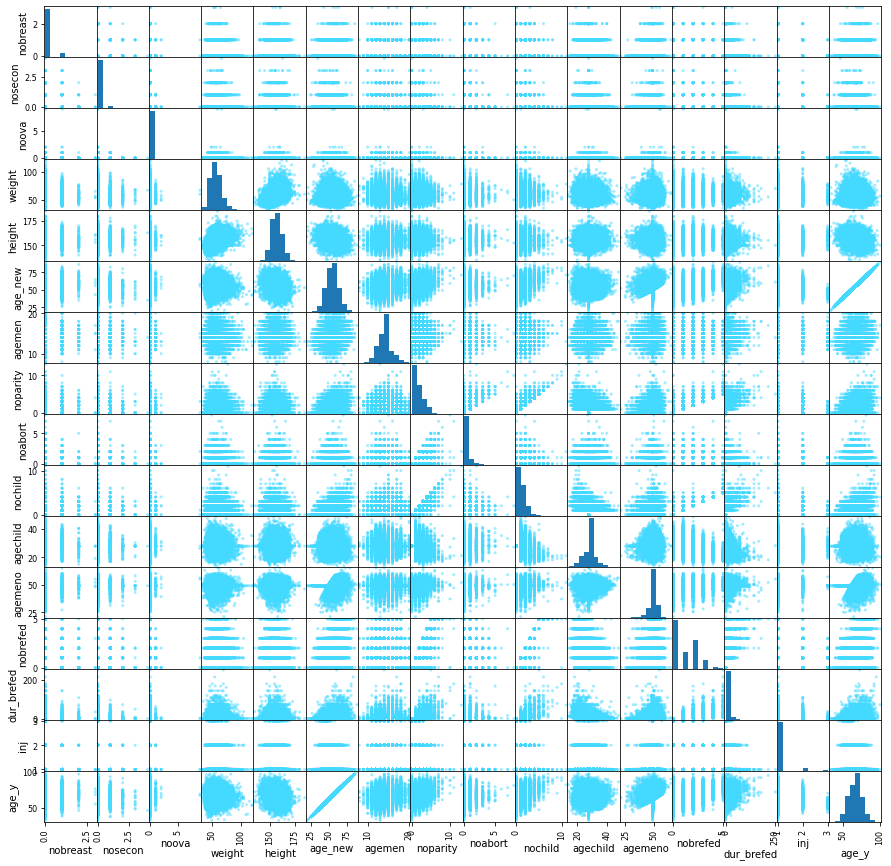

In [ ]:
df2 = df.dropna()
colors = df2["diag_cancer"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(15,15), color=colors);

Correlation plot

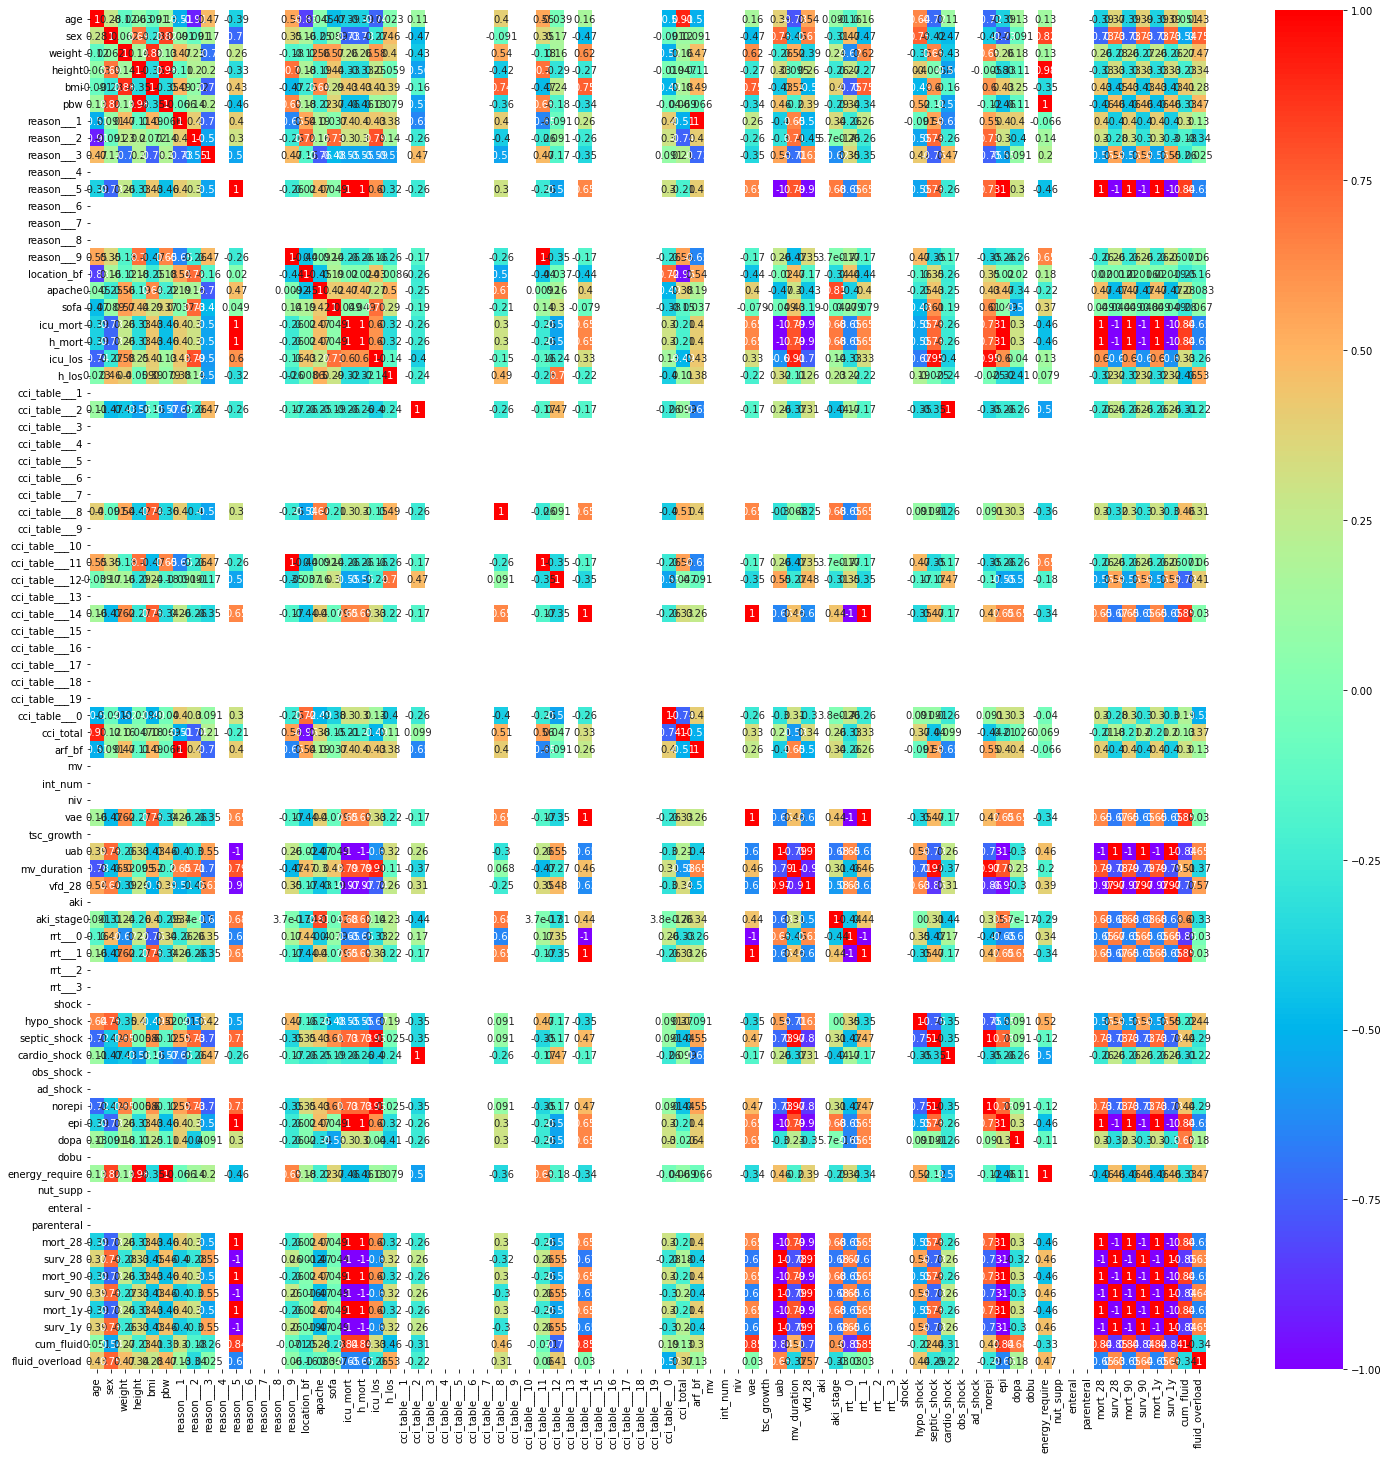

In [37]:
# plt.figure(figsize = (10,5))
plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

### It was already converted all 'object' column type to 'category' then encoding


In [ ]:
# df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category').cat.codes)

In [39]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 17
Data columns (total 95 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             7 non-null      int64         
 1   sex             7 non-null      int64         
 2   weight          7 non-null      float64       
 3   height          7 non-null      int64         
 4   bmi             7 non-null      float64       
 5   pbw             7 non-null      float64       
 6   h_adm           7 non-null      datetime64[ns]
 7   icu_adm         7 non-null      datetime64[ns]
 8   icu_dc          7 non-null      datetime64[ns]
 9   h_dc            7 non-null      datetime64[ns]
 10  reason___1      7 non-null      int64         
 11  reason___2      7 non-null      int64         
 12  reason___3      7 non-null      int64         
 13  reason___4      7 non-null      int64         
 14  reason___5      7 non-null      int64         
 15  reason___

(7, 95)

In [43]:
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
# X = df.drop('diag_cancer', axis=1)
# y = df['diag_cancer'].apply(lambda x:0 if x == 1 else 1)
X = df[useColumns]
y = df[predictColums]
X.sample(5)

,age,sex,weight,height,bmi,pbw,reason___1,reason___2,reason___3,reason___4,...,norepi,epi,dopa,dobu,energy_require,nut_supp,enteral,parenteral,cum_fluid,fluid_overload
2,56,0,74.0,158,29.64,50.60,1,0,0,0,...,1.0,1.0,1.0,0.0,1265.00,1,1,0,23245,1.31
8,39,0,52.5,160,20.51,52.42,1,1,0,0,...,1.0,1.0,0.0,0.0,1310.50,1,1,0,11109,-2.82
17,55,0,49.0,153,20.93,46.05,0,0,1,0,...,0.0,0.0,0.0,0.0,1151.25,1,1,0,617,0.15
7,64,1,55.0,175,17.96,70.57,0,0,1,0,...,0.0,0.0,0.0,0.0,1764.25,1,1,0,5304,1.45
1,60,1,60.9,158,24.40,55.10,1,0,0,0,...,0.0,0.0,0.0,0.0,1377.50,1,1,0,1697,2.88


In [44]:
X.columns

Index(['age', 'sex', 'weight', 'height', 'bmi', 'pbw', 'reason___1',
       'reason___2', 'reason___3', 'reason___4', 'reason___5', 'reason___6',
       'reason___7', 'reason___8', 'reason___9', 'pdx', 'icd10_pdx', 'apache',
       'sofa', 'cci_table___1', 'cci_table___2', 'cci_table___3',
       'cci_table___4', 'cci_table___5', 'cci_table___6', 'cci_table___7',
       'cci_table___8', 'cci_table___9', 'cci_table___10', 'cci_table___11',
       'cci_table___12', 'cci_table___13', 'cci_table___14', 'cci_table___15',
       'cci_table___16', 'cci_table___17', 'cci_table___18', 'cci_table___19',
       'cci_table___0', 'arf_bf', 'mv', 'int_num', 'int_date_1', 'ext_date_1',
       'niv', 'vae', 'tsc_growth', 'mv_duration', 'aki', 'aki_stage',
       'rrt___0', 'rrt___1', 'rrt___2', 'rrt___3', 'shock', 'hypo_shock',
       'septic_shock', 'cardio_shock', 'obs_shock', 'ad_shock', 'norepi',
       'epi', 'dopa', 'dobu', 'energy_require', 'nut_supp', 'enteral',
       'parenteral', 'cum_fluid

In [56]:
# 0 for non-cancer
# 1 for cancer
# y.value_counts()

In [55]:
# plot group by colors
# plt.figure(figsize=(8,8))
# plt.scatter(X['cum_fluid'],y['surv_28'],c=y,s=80,alpha=0.6)
# plt.xlabel('Feature cum_fluid --->')
# plt.ylabel('Feature icu_los --->')
# plt.title('Breast Cancer Data')

## Spliting data between train: test at ratio 70:30

In [52]:
X.shape,y.shape

((7, 70), (7, 12))

In [53]:
#Spliting data 30% as test / 70% as training
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(4, 70) (3, 70) (4, 12) (3, 12)


In [54]:
# 0 for non-cancer
# 1 for cancer
# y_train.value_counts()

icu_los  h_los  vfd_28  mort_28  doa_28      surv_28  mort_90  doa_90      surv_90  mort_1y  doa_1y      surv_1y
4        66     25      0        6/12/2015   28       0        8/13/2015   90       0        5/14/2016   365        1
6        6      23      0        11/17/2014  28       0        1/18/2015   90       0        10/20/2015  365        1
11       11     0       1        7/18/2014   11       1        7/18/2014   11       1        7/18/2014   11         1
13       42     18      0        9/20/2014   28       0        11/21/2014  90       0        8/23/2015   365        1
dtype: int64

## For Adaptive Boost, please set the number of stump = 10

### Adaptive Boost + DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
#tuning find the best paramter by GridSearchCV
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = {'max_depth':range(1,10),
                    'min_samples_leaf':range(1,5),
                    'criterion' : ['gini', 'entropy']}

# scores = ['accuracy','f1']
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

scores = {'accuracy': make_scorer(accuracy_score),
          'f1': make_scorer(f1_score)}

use gridesearch to find best hyperparameter

In [59]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 10509, 1: 68},random_state=0), cv = 10, param_grid=tuned_parameters, verbose=1, n_jobs=-1, scoring=score, return_train_score=True)
  clf.fit(X_train, y_train)
  
  print("Best parameters set found on development set:",score,clf.best_params_)
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for accuracy



TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# print best parameter after tuning
print("Best Score:", clf.best_score_,"using",clf.best_params_)
# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

Best Score: 0.5604995004995004 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3}
DecisionTreeClassifier(class_weight={0: 10509, 1: 68}, criterion='entropy',
                       max_depth=9, min_samples_leaf=3, random_state=0)


In [ ]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
      # if(type(p_v) == dict):
      #    p_v = str(p_v)
      masks.append(list(results['param_'+p_k].data==p_v))
    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        # for handle dict parameter such as class weight
        if(type(x[0]) == dict):
         x = [str(item) for item in x]
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

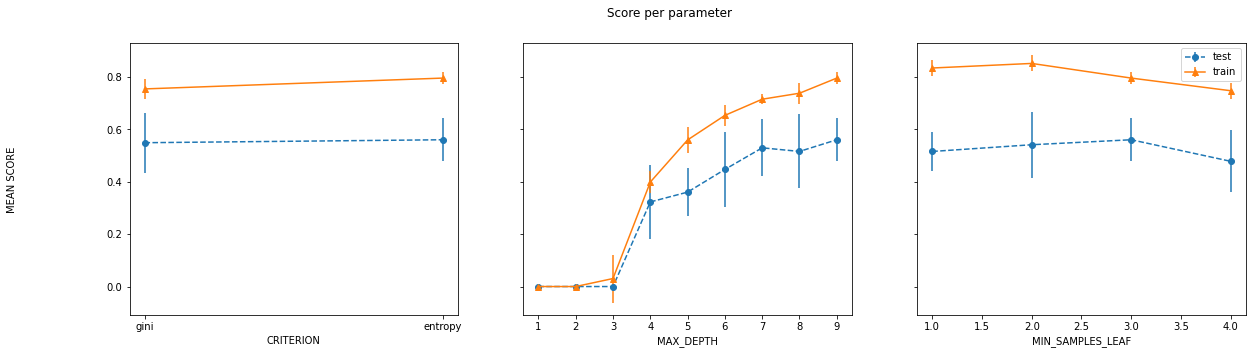

In [ ]:
plot_search_results(clf)

#### Calculate score before using adaboost

Accuracy score is:  0.9958094397882664
Recall score is:  0.48148148148148145
F1 score is:  0.5777777777777777
Confusion Matrix: 
       0   1
0  4502   5
1    14  13
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.72      0.48      0.58        27

    accuracy                           1.00      4534
   macro avg       0.86      0.74      0.79      4534
weighted avg       1.00      1.00      1.00      4534



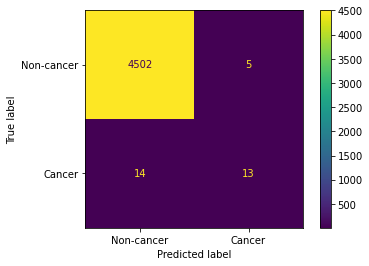

In [ ]:
# create model using parameter from tune summary tune
grid_predictions = clf.predict(X_test)
# sns.heatmap(confusion_matrix(y_test,grid_predictions),annot=True,fmt='d',)
print("Accuracy score is: ",accuracy_score(y_test,grid_predictions))
print("Recall score is: ",recall_score(y_test,grid_predictions))
print("F1 score is: ",f1_score(y_test,grid_predictions))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, grid_predictions)))
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_predictions), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, grid_predictions))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Max accuracy [0.9969122187913542, 23]


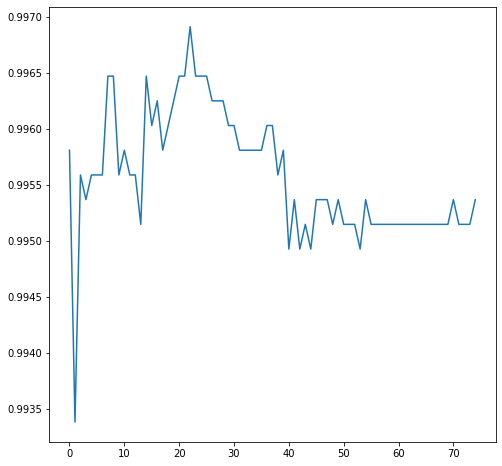

In [ ]:
accuracyAll = []
maxacc = [0,0]
for i in range(75):
  
  bdt = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=i+1, random_state=0, learning_rate=1.0)
  bdt.fit(X_train, y_train)

  y_pred = bdt.predict(X_test) 
  confusion = confusion_matrix(y_test,y_pred)
  
  accuracy = accuracy_score(y_test, y_pred)
  accuracyAll.append(accuracy)
  if(accuracy > maxacc[0]):
    maxacc[0] = accuracy
    maxacc[1] = i+1
  
print('Max accuracy',maxacc)
plt.figure(figsize=(8,8))
plt.plot(accuracyAll)

In [ ]:
preds = np.stack([tree.predict(X_test.to_numpy()) for tree in bdt.estimators_])

In [ ]:
print('iteration',maxacc[1],'provide highest score for accuracy score.')

iteration 23 provide highest score for accuracy score.


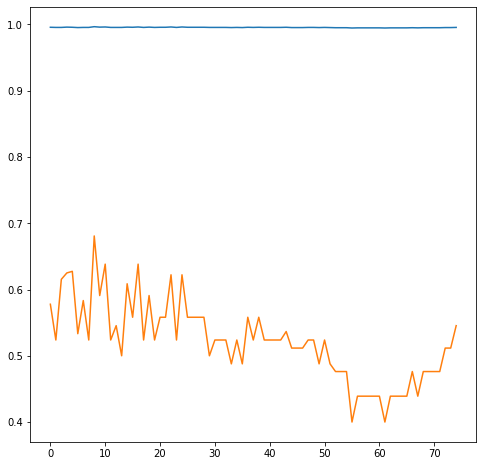

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(8,8))
plt.plot([accuracy_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])
plt.plot([f1_score(y_test,stats.mode(preds[:i+1],axis=0).mode[0]) for i in range(75)])

iteration 8 provide highest score for f1 score.

In [ ]:
# Create and fit an AdaBoosteddecision tree
AdaDecision = AdaBoostClassifier(clf.best_estimator_,algorithm="SAMME",n_estimators=8, random_state=0, learning_rate=1.0)
AdaDecision.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 10509,
                                                                       1: 68},
                                                         criterion='entropy',
                                                         max_depth=9,
                                                         min_samples_leaf=3,
                                                         random_state=0),
                   n_estimators=8, random_state=0)

#### Report score for Decision tree + Adaboost

Accuracy score is:  0.9964711071901191
Recall score is:  0.5925925925925926
F1 score is:  0.6666666666666666
Confusion Matrix:of Decision tree + Adaboost : 
       0   1
0  4502   5
1    11  16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.76      0.59      0.67        27

    accuracy                           1.00      4534
   macro avg       0.88      0.80      0.83      4534
weighted avg       1.00      1.00      1.00      4534



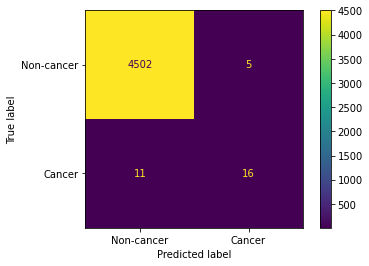

In [ ]:
y_predDtree = AdaDecision.predict(X_test) 
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

After using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16

## For GBT, please set learning rate = 0.1and number of tree = 10

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbt_model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=10, max_depth=1,random_state=0)

### Use SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 6536115)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
print('After SMOTE, the shape of train_X: {}'.format(X_train_SMOTE.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_SMOTE.shape))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_SMOTE == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_SMOTE == 0)))

After SMOTE, the shape of train_X: (21018, 38)
After SMOTE, the shape of train_y: (21018,) 

After SMOTE, counts of label '1': 10509
After SMOTE, counts of label '0': 10509


In [ ]:
gbt_model.fit(X_train_SMOTE, y_train_SMOTE)

GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=0)

Accuracy score is:  0.9830172033524481
Recall score is:  0.9629629629629629
F1 score is:  0.40310077519379844
Confusion Matrix: 
       0   1
0  4431  76
1     1  26
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4507
           1       0.25      0.96      0.40        27

    accuracy                           0.98      4534
   macro avg       0.63      0.97      0.70      4534
weighted avg       1.00      0.98      0.99      4534



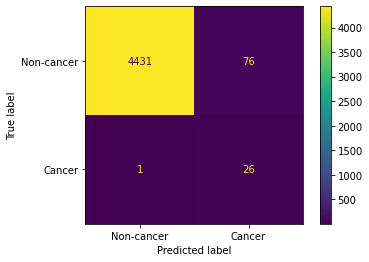

In [ ]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### use class weight

In [ ]:
gbt_model.fit(X_train, y_train, sample_weight=10509/68)

GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=0)

Accuracy score is:  0.9971327745919718
Recall score is:  0.7037037037037037
F1 score is:  0.7450980392156864
Confusion Matrix: 
       0   1
0  4502   5
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.79      0.70      0.75        27

    accuracy                           1.00      4534
   macro avg       0.89      0.85      0.87      4534
weighted avg       1.00      1.00      1.00      4534



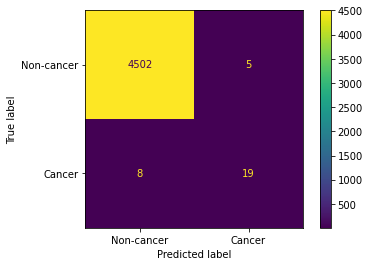

In [ ]:
y_pred_gbt = gbt_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Dicussion about GBT class weight and SMOTE
GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

## For XGBoost, please set λ = 0, γ = 1, Max depth = 6and ε = 0.3 and number of tree = 10

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(lamda=0, gamma=1, max_depth=6, eta=0.3, n_estimators=10,random_state=0)

### Use SMOTE

In [ ]:
xgb_model.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(eta=0.3, gamma=1, lamda=0, max_depth=6, n_estimators=10)

Accuracy score is:  0.9872077635641817
Recall score is:  0.8888888888888888
F1 score is:  0.45283018867924524
Confusion Matrix: 
       0   1
0  4452  55
1     3  24
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4507
           1       0.30      0.89      0.45        27

    accuracy                           0.99      4534
   macro avg       0.65      0.94      0.72      4534
weighted avg       1.00      0.99      0.99      4534



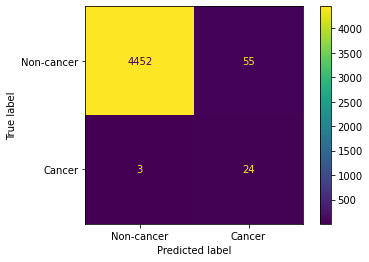

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

### without SMOTE

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(eta=0.3, gamma=1, lamda=0, max_depth=6, n_estimators=10)

Accuracy score is:  0.9966916629907366
Recall score is:  0.7037037037037037
F1 score is:  0.7169811320754716
Confusion Matrix: 
       0   1
0  4500   7
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.73      0.70      0.72        27

    accuracy                           1.00      4534
   macro avg       0.86      0.85      0.86      4534
weighted avg       1.00      1.00      1.00      4534



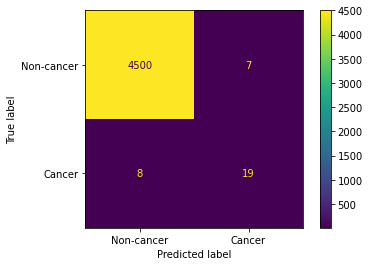

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE)

## Finally, compare the performance of Adaptive Boost, Gradient Boost Tree, and XGBoostTree using appropriate metrics, selecting the best model and providing strong rationale for the choice.

### Result score Adaboost + Decision tree
- using adaboost + decesion tree is better than decesion tree alone  
- since using adaboost with decision tree f1 score was slighty increase from 0.578 to 0.667 due to false neg decrease from 14 to 11 and true pos increase from 13 to 16.

Accuracy score is:  0.9964711071901191
Recall score is:  0.5925925925925926
F1 score is:  0.6666666666666666
Confusion Matrix:of Decision tree + Adaboost : 
       0   1
0  4502   5
1    11  16
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.76      0.59      0.67        27

    accuracy                           1.00      4534
   macro avg       0.88      0.80      0.83      4534
weighted avg       1.00      1.00      1.00      4534



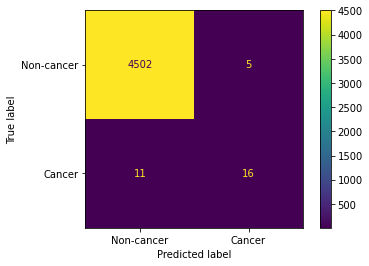

In [ ]:
print("Accuracy score is: ",accuracy_score(y_test,y_predDtree))
print("Recall score is: ",recall_score(y_test,y_predDtree))
print("F1 score is: ",f1_score(y_test,y_predDtree))
print("Confusion Matrix:of Decision tree + Adaboost : \n",pd.DataFrame(confusion_matrix(y_test,y_predDtree)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predDtree), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_predDtree))

### Result score  GBT using class weight
- GBT model use class weight is better than use SMOTE due to confusion matrix show GBT with SMOTE data significantly increase false positive prediction from 5 to 76 number, which have 3 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.745(class weight) to 0.403(SMOTE)

Accuracy score is:  0.9971327745919718
Recall score is:  0.7037037037037037
F1 score is:  0.7450980392156864
Confusion Matrix: 
       0   1
0  4502   5
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.79      0.70      0.75        27

    accuracy                           1.00      4534
   macro avg       0.89      0.85      0.87      4534
weighted avg       1.00      1.00      1.00      4534



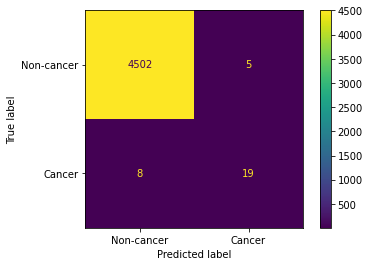

In [ ]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_gbt))
print("Recall score is: ",recall_score(y_test,y_pred_gbt))
print("F1 score is: ",f1_score(y_test,y_pred_gbt))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_gbt)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_gbt), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_gbt))

### Result score  XGBoost without SMOTE
- the same as GBT show XGBoost without SMOTE data is better due to confusion matrix show XGBoost with SMOTE data significantly increase false positive prediction from 7 to 55, which have 8 times wrong on predict compare to correct guess(true positive just only 26), and F1 score drop from 0.717(class weight) to 0.453(SMOTE).

Accuracy score is:  0.9966916629907366
Recall score is:  0.7037037037037037
F1 score is:  0.7169811320754716
Confusion Matrix: 
       0   1
0  4500   7
1     8  19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.73      0.70      0.72        27

    accuracy                           1.00      4534
   macro avg       0.86      0.85      0.86      4534
weighted avg       1.00      1.00      1.00      4534



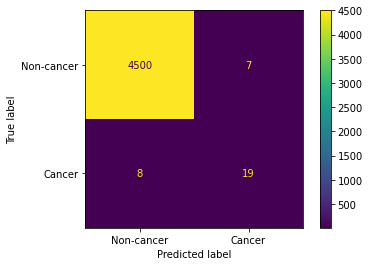

In [ ]:
print("Accuracy score is: ",accuracy_score(y_test,y_pred_xgb))
print("Recall score is: ",recall_score(y_test,y_pred_xgb))
print("F1 score is: ",f1_score(y_test,y_pred_xgb))
print("Confusion Matrix: \n",pd.DataFrame(confusion_matrix(y_test, y_pred_xgb)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels=['Non-cancer','Cancer']).plot()
print(classification_report(y_test, y_pred_xgb))

In [ ]:
dfscore = pd.DataFrame({
    "Model": ["Adaboost with Decision tree","GBT using class weight","XGBoost without SMOTE"],
    "Accuracy": [accuracy_score(y_test,y_predDtree),accuracy_score(y_test,y_pred_gbt),accuracy_score(y_test,y_pred_xgb)],
    "Recall": [recall_score(y_test,y_predDtree),recall_score(y_test,y_pred_gbt),recall_score(y_test,y_pred_xgb)],
    "F1_score": [f1_score(y_test,y_predDtree),f1_score(y_test,y_pred_gbt),f1_score(y_test,y_pred_xgb)]
}).set_index('Model')
dfscore

,Accuracy,Recall,F1_score
Model,,,
Adaboost with Decision tree,0.996471,0.592593,0.666667
GBT using class weight,0.997133,0.703704,0.745098
XGBoost without SMOTE,0.996692,0.703704,0.716981


In [ ]:
cfMatrixList = {"Adaboost + Decision tree":confusion_matrix(y_test, y_predDtree),
"GBT using class weight":confusion_matrix(y_test, y_pred_gbt),
"XGBoost without SMOTE":confusion_matrix(y_test, y_pred_xgb)}

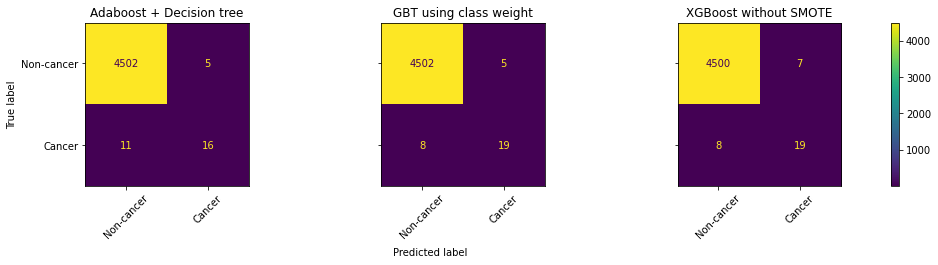

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(18, 3), sharey='row')

for i, (key, cf_matrix) in enumerate(cfMatrixList.items()):
    # y_pred = classifier.fit(X_train, y_train).predict(X_test)
    # cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['Non-cancer','Cancer'])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, -0.2, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

### $\color{green} {Discussion}$

Due to Breat cancer dataset was an imbalance dataset we cannot use accuracy to evaluation, use f1 score instead.  
In result GBT with class weight was the best model. Since, the comparison result show GBT class weight get highest score for f1 = 0.745(while Adaboost with Decision tree get f1 0.667 and XGBoost without SMOTE show 0.717), also recall = 0.704 was the best as well. compare with Adaboost have recall 0.593 and XGBoost show  0.704 which equall to GBT but f1 was lower.